In [2]:
import matplotlib.pyplot as plt
import numpy as np
import quantecon as qe
import random
from IPython.display import Image
from numba import njit, int64, float64, prange
from numba.experimental import jitclass
%matplotlib inline

##### Hasan Cetin

[Github Link](https://github.com/hamecetin/QuantEcon.git)

---

#### Goal

In this program, we are going to replicate Arellano (08) model economy and simulate the process.

#### Model

- Risk averse identical agents/citizens in a country, (assume there is a representitative agent) having β time discounting.
- One benevolent government (maximizes representitative agent's expected utility), who has the sole access to foreign assets. 
- It is a stochastic endowment economy.
- Foreign creditors are risk neutral and have deep pocket (i.e. can buy or sell as much asset as they want). Their time discounting is $\frac{1}{(1+r)}$.
- One risk free (exogenously risk free) foreign asset. (**Exogenously incomplete market**)
- The government can default on its debt at the beginning of the period after seeing its endowment shock. (**Endogenously incomplete market**)
- If government decides to default, he will be penalized by a default output $h(y)$ until he gets forgiven by the international market.
- The defaulted government has $\theta$ probability of being forgiven each default period.

#### Timing and the Value functions of the Government

- It is an Eaton Gersovitz type of model.

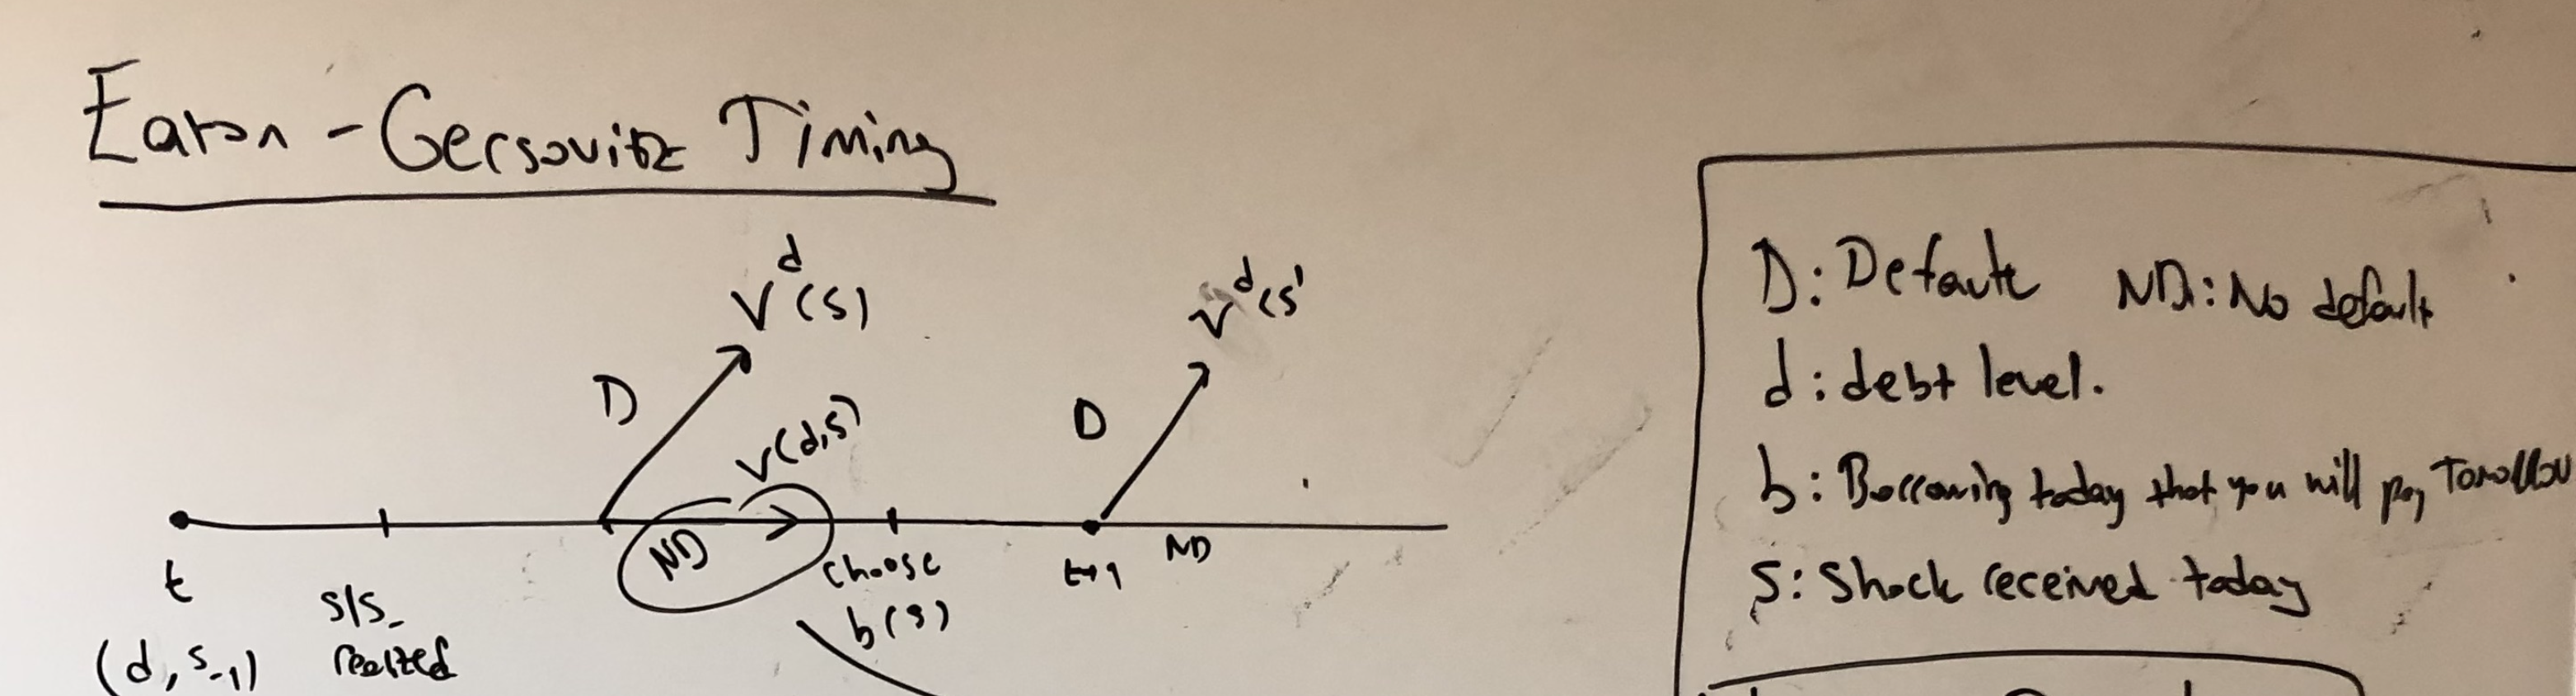

In [3]:
Image("EG_timing.png")

- After seeing today's endowment $y_t$, at the beginning of the period, government will decide whether default on its debt or not. So, the state variables are:
    * Debt that the government has to pay today
    * Today's endowment

We can write down the government's at the beginning of the period default or no defualt decision as the following:

$$V(B,y) = \max_{D, ND} \left\{ V_{ND}(B,y), V_{D}(y)\right\}$$

where,

$$V_{D}(y) = u(h(y)) + β \int [θ V(0,y') + (1-θ)V_D(y')]π(y'|y)dy'$$
$$V_{ND}(B,y) = \max_{B'} \left\{ u(y + B - q(B',y)B') + β \int V(B',y')π(y'|y)dy' \right\}$$

- Here, in order not to get confused, note the following: The government can save by purchasing one period foreign asset as well. i.e. $B \leq, \geq 0$ if B > 0, that means the government saved yesterday for today and he enjoys positive B, if it is negative then he borrowed yesterday and he needs to repay if he wants to continue having an access to international asset market.

- From this, we can infer that government won't default if B > 0.

#### Why $q(B',y)$?

This is where the endogenous incompleteness comes in. Now, government can default and creditors know this, (they also know the government's endowment process). The price depends on the default probability tomorrow of the government.

The default next period can be computed as:

$$δ(B',y) = \int \mathbb{I}\left\{V_{ND}(B',y') < V_D(y') \right\}π(y'|y)dy'$$

- So, price depends on:
    - tomorrow's endowment y'
    - B'

Since B'(B,y) and since tomorrow's endowment depends on today's endowment because of $π(y',y)$, price depends on y as well.

Thus $q(B',y)$.

In equilibrium, our risk neutral beloved creditors will yield zero profits and this makes the price function in equilibrium as:

$$q(B',y) = \dfrac{1-δ(B',y)}{1+r}$$

### Computation of the Equilibrium

We will define the following class and functions in order:

- Arellano() (class): To store the parameters of the model.
- u(): Utility function of the representative agent.
- q(): 
deneme